<a href="https://colab.research.google.com/github/shivamkainth/deeplearning/blob/master/Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 # **Building an AutoEncoder model**



##1.1 Importing LIbraries

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Sepreate Encoder model
encoder = Model(input_img, encoded)
#Seperate Decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

## 1.2 Defining the model

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## 1.3 Data Preprocessing

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
#Normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


## 1.4 Training the model

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.3479 - val_loss: 0.2696
Epoch 2/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2611 - val_loss: 0.2486
Epoch 3/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2382 - val_loss: 0.2262
Epoch 4/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2193 - val_loss: 0.2101
Epoch 5/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.2055 - val_loss: 0.1985
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1950 - val_loss: 0.1889
Epoch 7/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.1865 - val_loss: 0.1812
Epoch 8/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.1793 - val_loss: 0.1746
Epoch 9/50
60000/60000 [==============================] - 5s 8

## 1.5 Displaying the output

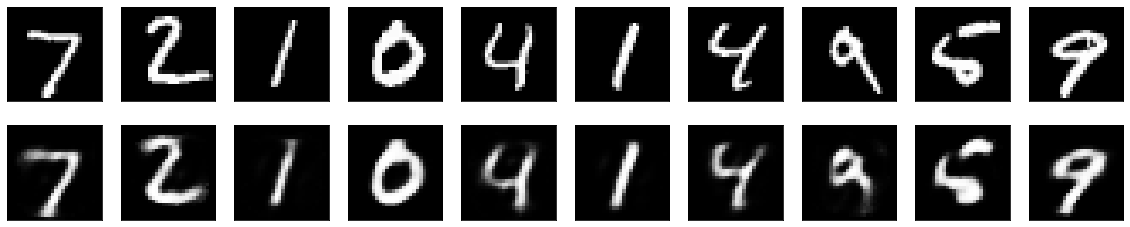

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()